# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [ ]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

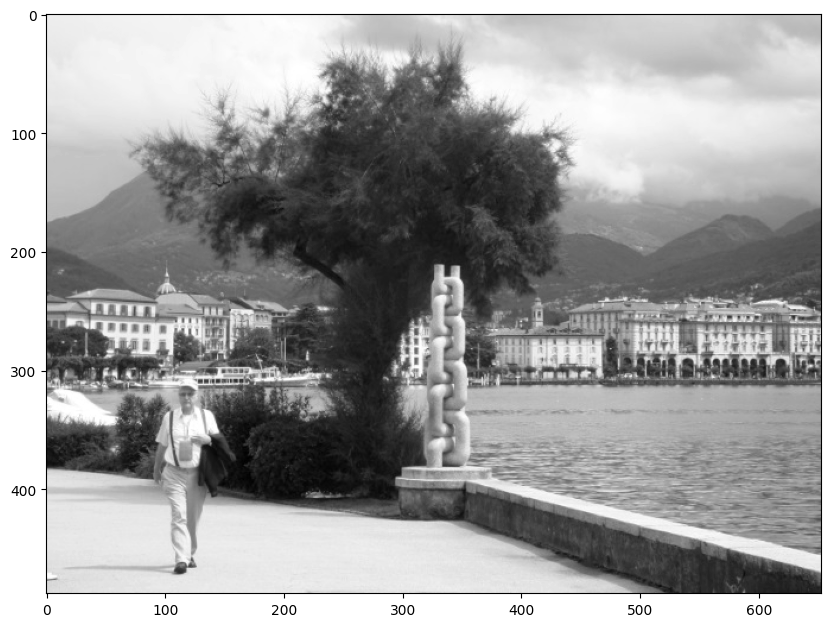

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,10)
imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [ ]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

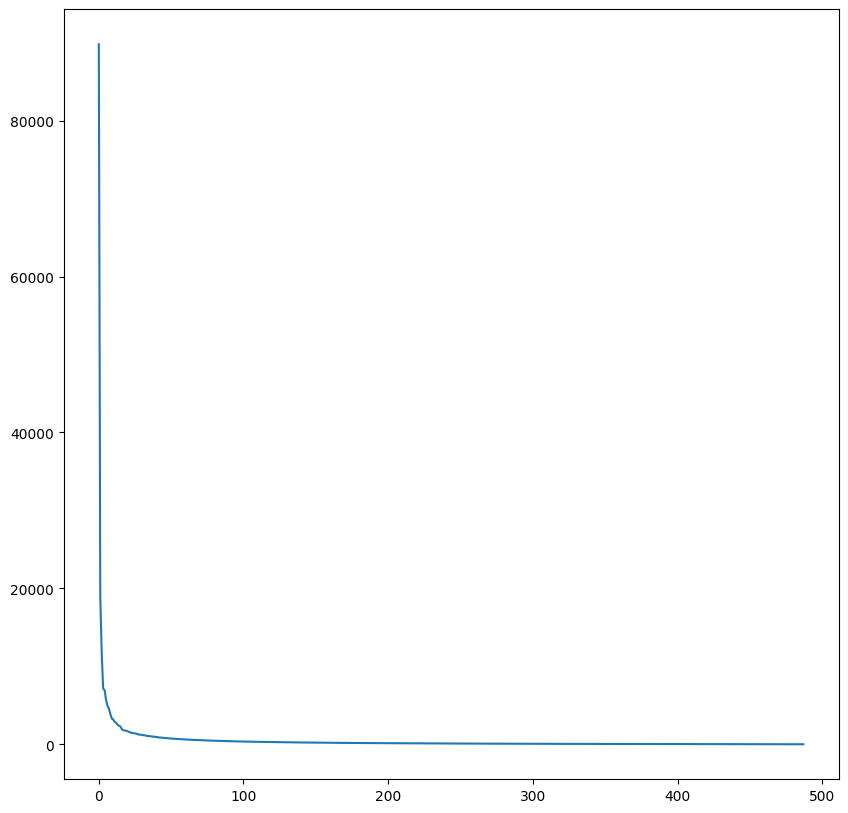

In [ ]:
plt.plot(S)

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

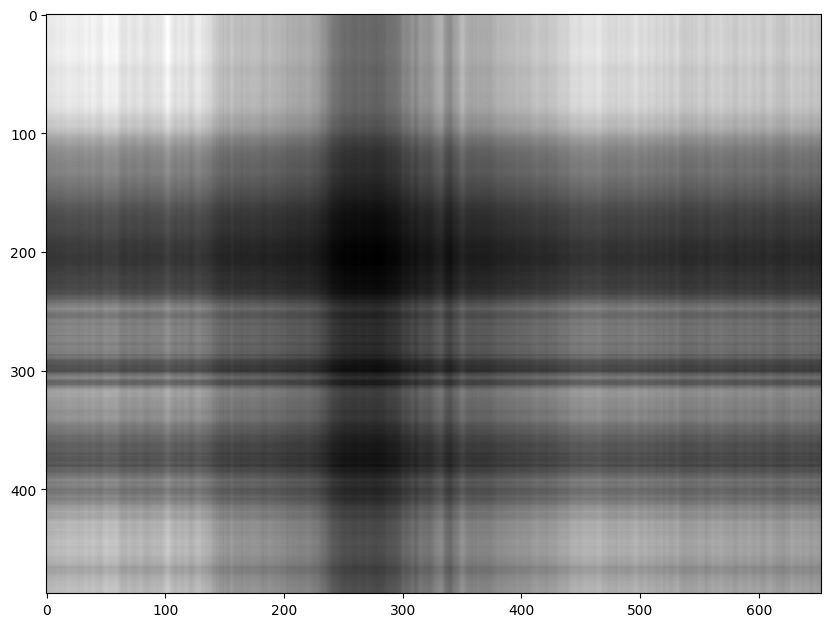

In [ ]:
U_1 = U[:,:1]
S_1 = S[0]
V_1 = VT.T[:,0:1]
rank_1 = S_1 * U_1 @ V_1.T
plt.imshow(rank_1, cmap='gray')

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

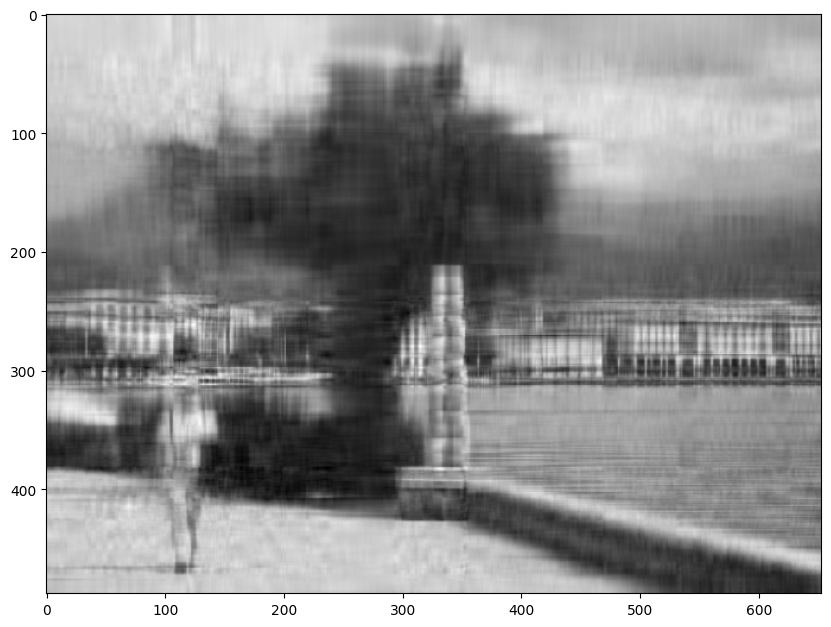

In [ ]:
# 1 - 20
U_1_20 = U[np.arange(U.shape[0])[:, None], np.arange(20)[None, :]]
V_1_20 = VT.T[np.arange(VT.shape[1])[:, None], np.arange(20)[None, :]]
S_1_20 = S[:20]
rank_1_20 = S_1_20 * U_1_20 @ V_1_20.T
plt.imshow(rank_1_20, cmap='gray')

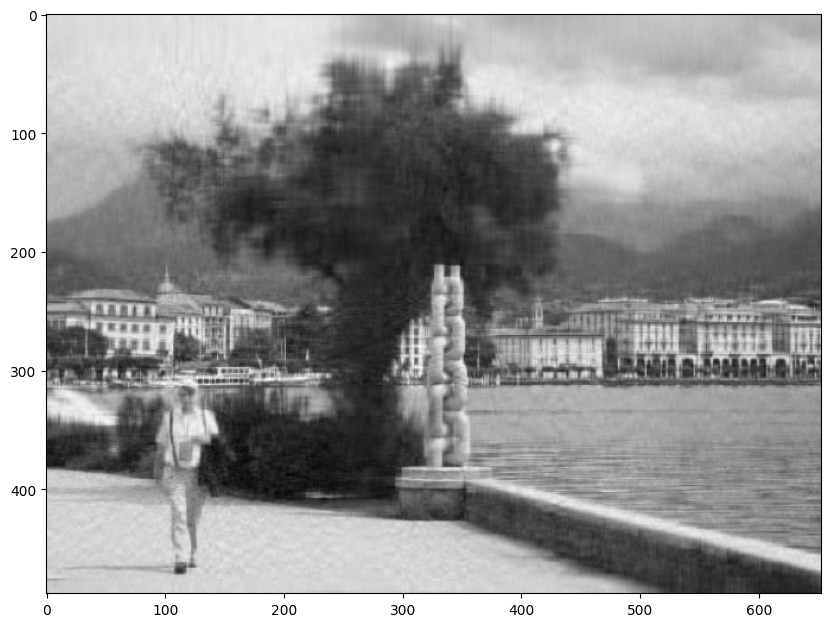

In [ ]:
# 1 - 50
U_1_50 = U[np.arange(U.shape[0])[:, None], np.arange(50)[None, :]]
V_1_50 = VT.T[np.arange(VT.shape[1])[:, None], np.arange(50)[None, :]]
S_1_50 = S[:50]
rank_1_50 = S_1_50 * U_1_50 @ V_1_50.T
plt.imshow(rank_1_50, cmap='gray')

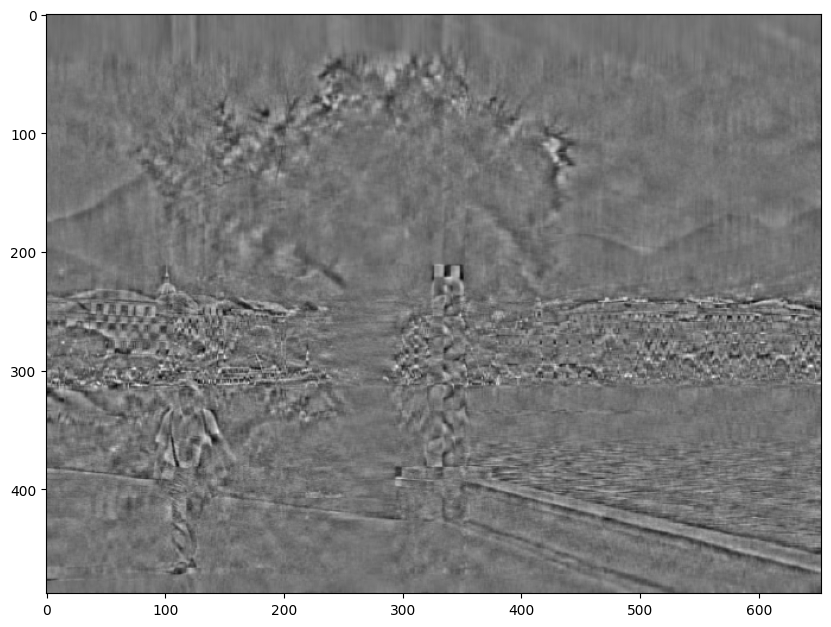

In [ ]:
# 20 - 100
U_20_100 = U[np.arange(U.shape[0])[:, None], np.arange(100)[None, 20:]]
V_20_100 = VT.T[np.arange(VT.shape[1])[:, None], np.arange(100)[None, 20:]]
S_20_100 = S[20:100]
rank_20_100 =  S_20_100 * U_20_100 @ V_20_100.T
plt.imshow(rank_20_100, cmap='gray')

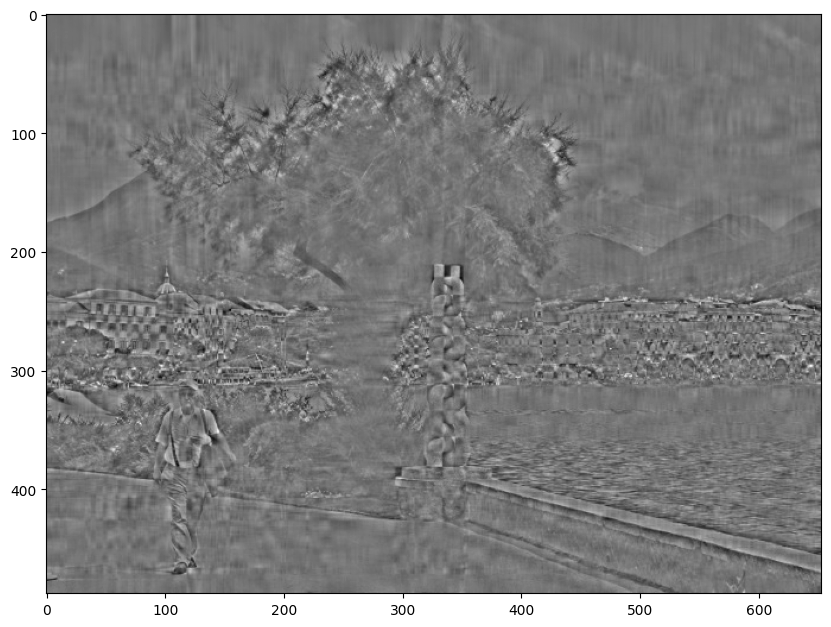

In [ ]:
# 20 - last
U_20_last = U[np.arange(U.shape[0])[:, None], np.arange(U.shape[0])[None, 20:]]
V_20_last = VT.T[np.arange(VT.shape[1])[:, None], np.arange(VT.shape[0])[None, 20:]]
S_20_last = S[20:]
rank_20_last = S_20_last * U_20_last @ V_20_last.T
plt.imshow(rank_20_last, cmap='gray')

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

**Из теоремы о низкоранговом приближении следует, что наилучшим $k$-ым приближением исходной матрицы $A$ является такая матрица $A_k$, что $A_k =  U\Sigma_{k}V^T$, где $U, V$ - матрицы из SVD разложения исходной матрицы, а $\Sigma_{k}$ - матрица, полученная из $\Sigma$ обнулением $i$-ых диагоналей для $i>k$. Таким образом, если мы хотим приблизительно восстановить исходную картинку, нам надо взять первые $k$ компонент ранга 1. Продемонстрируем результат для $k = 224$.**

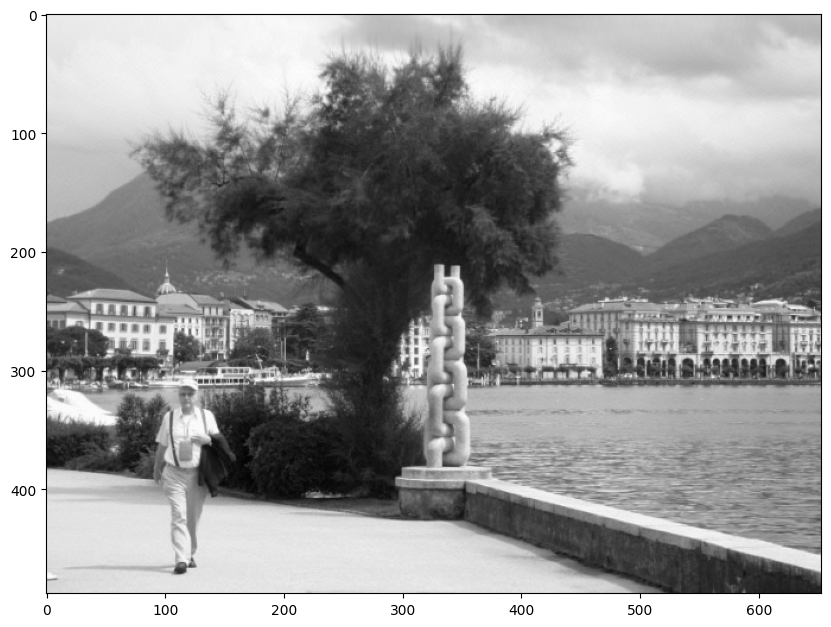

In [ ]:
# 1 - 224
U_1_224 = U[np.arange(U.shape[0])[:, None], np.arange(224)[None, :]]
V_1_224 = VT.T[np.arange(VT.shape[1])[:, None], np.arange(224)[None, :]]
S_1_224 = S[:224]
rank_1_224 = S_1_224 * U_1_224 @ V_1_224.T
plt.imshow(rank_1_224, cmap='gray')

In [ ]:
V_1_224.shape

(653, 224)

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

**Если исходное изображение имело размер $m\times n$, то теперь мы можем хранить первые $k$ столбцов $U, V$ и первые $k$ диагональных элементов матрицы $Σ$. Итого затраты по памяти будут равны $k\cdot m + k\cdot n + k = k(m + n + 1)$ ⇒ затраты по памяти уменьшатся в $\frac{mn}{ k(m + n + 1)}$ раз.**

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

**Сначала сделаем расчет с помощью функции nbytes, которая возвращает количество затраченных бит:**

In [ ]:
print(f'изначально: {img.nbytes} бит')
print(f'после сжатия: {U_1_224.nbytes + S_1_224.nbytes + V_1_224.nbytes} бит')

изначально: 2549312 бит
после сжатия: 2046464 бит


**Теперь посчитаем руками: сначала найдем размер изображения *image_size* в битах**

In [ ]:
img.shape

(488, 653)

**image_size $= 488 \cdot 653 \cdot 8 = 2549312$ бит.**

**А теперь, исходя из нашего расчета найдем размер *image_after_size* сжатого изображения:**

**image_after_size $= 224\cdot(653 + 488 + 1) = 2046464$ бит**

**Таким образом, мы убедились, что наши расчеты сходятся с реальностью.**


---



### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

---



**Рассмотрим оператор $\phi^*(w) = X^TXw$. Оператор $\phi^*$ самосопряженный, так как $X^TX$ - симметричная матрица (это достаточное условие, чтобы оператор был самосопряженным). Тогда существует ортонормированный базис, который состоит из собственных векторов этого оператора. Пусть этот набор векторов выглядит как $v_1, v_2, ... , v_n$.**

**Тогда представим наш вектор $w$ в виде суммы базисных: $w = a_1v_1 + a_2v_2 + ... + a_nv_n ⟺ |w| = \sqrt{a_1^2 + a_2^2 + ... + a_n^2}$**

**Рассмотрим действие оператора на вектор $w$: $\phi^*(w) = a_1\phi^*(v_1) + a_2\phi^*(v_2) + ... + a_n\phi^*(v_n) = a_1σ_1^2v_1 + a_2σ_2^2v_2 + ... + a_nσ_n^2v_n$ ($σ_k^2$ - собственное значение матрицы $X^TX$ ⟹ применяя $\phi^*$ к вектору $v_k$ получим $σ_k^2v_k$)**

**Теперь вернемся к исходному вопросу и рассмотрим $|Xw|^2$**:


**$|Xw|^2 = (Xw)^T(Xw) = w^T X^TXw = w^T(X^TXw) = w^T (a_1σ_1^2v_1 + a_2σ_2^2v_2 + ... + a_nσ_n^2v_n) = a_1^2σ_1^2 + a_2^2σ_2^2 + ... + a_n^2σ_n^2$ (напомним, что $|v_k^2| = 1$).**

**Но $\sigma_1 = \max\limits_{i \in [1, n]} \sigma_i ⟹ a_1^2σ_1^2 + a_2^2σ_2^2 + ... + a_n^2σ_n^2 \leq \sigma_1^2(a_1^2 + a_2^2 + ... + a_n^2) = σ_1^2|w|^2$**

**Отсюда получаем, что $|Xw|^2\leq \sigma_1^2|w|^2 ⟺ \frac{|Xw|}{|w|}\leqσ_1$, причем равенство достигается тогда и только тогда, когда $w$ - собственный вектор с собственным значением $\sigma_1 \Longrightarrow \sigma_1 = \max\limits_{w} \frac{|Xw|}{|w|}$**

**Итак, первое равенство доказано.**

---



**Теперь покажем второе равенство**

**Пусть $w = \alpha\cdot v$, где $|v| = 1$. Тогда имеем следующее: $ \sigma_1 = \max\limits_{w} \frac{|Xw|}{|w|} \Longleftrightarrow \sigma_1 = \max\limits_{\alpha v} \frac{|X\alpha v|}{|\alpha v|} = \max\limits_{\alpha v}\frac{|Xv|}{|v|} = \max\limits_{|v| = 1}{|Xv|}$**

**Второе равенство тоже доказано**

---



**Осталось показать последнее равенство**

**Действительно, $\sigma_1 = \max\limits_{|u|=|v| = 1}|u^TXv| = \max\limits_{|u|=|v| = 1}\sqrt{(u^TXv)^T(u^TXv)} = \max\limits_{|u|=|v| = 1}\sqrt{v^TX^Tuu^TXv} = \max\limits_{|u|=|v| = 1}\sqrt{v^TX^T|u|^2Xv} = \bigg||u|= 1\bigg| = \max\limits_{|v| = 1}\sqrt{v^TX^TXv} = \max\limits_{|v| = 1}|Xv|$**

**Последнее верно в силу предыдущего пункта, следовательно, последнее равенство доказано, тем самым вся цепочка равенств также доказана.**

---




**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.



*   **Нетрудно понять, что $rkA = 1$. Действительно, любые две строки $i, j$
  приводятся к одинаковому виду путем умножения $i$-той строки на $\frac{1}{sin(i)}$ и $j$-той на $\frac{1}{sin(j)}$ ⟹ любые две строки равны с точностью до домножения на некоторый коэффициент ⟹ все строки линейно зависимы ⟹ $rkA = 1$.**

*  **Можно заметить, что если положить $x_1 = \sqrt{\sum\limits_{i=0}^{n-1}sin^2 (i)}$ и $x_2 = \sqrt{\sum\limits_{i=0}^{n-1}cos^2 (i)}$ $\hspace{0,9mm}$ (коэффициенты, нужные для того, чтобы столбцы матриц $U, V$ были ортонормированы), то подходящим SVD разложением исходной матрицы будет следующее ее представление (прямым перемножением нетрудно убедиться, что это правда):**

$$\begin{pmatrix} \frac{sin(0)}{x_1} \\ \vdots \\ \frac{sin(n-1)}{x_1} \end{pmatrix} \ \begin{pmatrix} x_1\cdot x_2\end{pmatrix} \begin{pmatrix} \frac{cos(0)}{x_2} \\ \vdots \\ \frac{sin(n-1)}{x_2} \end{pmatrix}^T$$







**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

**$A = U\Sigma V^T ⟺ AV = U\Sigma$ ($V$ - ортогональная матрица, следовательно, мы знаем, что $VV^T = E$). Так как $rkA = r$, то $rk\Sigma = r$ (это следствие теоремы о низкоранговом приближении). Таким образом, $\Sigma$ имеет вид:**

$$\begin{pmatrix}
  σ_1& 0& …& 0&…& 0\\
  0& \sigma_2&  …& 0&…& 0\\
  0& 0&  …& σ_r&…& 0\\
  \vdots&\vdots\ &&\vdots& &\vdots\\
  0& 0&  …& 0&…& 0\\
\end{pmatrix}$$

**Отсюда видно, что при действии отображения $\mathcal{A}$ на векторы ($v_1, v_2, ..., v_n$) образом вектора $v_i, i\leq r$ является $\sigma_iu_i$ ($u_i$ - столбец матрицы $U$), а при $i>r$ образом $v_i$ является $0$ ⟹ $Ker\mathcal{A} = \langle v_{r+1}, ..., v_{n} \rangle$. Больше количество векторов не может порождать ядро, так как $rkA = r ⟹ dim (ker\mathcal{A}) = n - r$, но как раз такое количество порождающих векторов мы и получили.**

**Мы уже заметили, что при действии отображения не зануляются только такие векторы $v_i$, что $i\leq r$. При этом они переходят в некоторый вектор $\sigma_iu_i$ ⟹ векторы $u_i, i\leq r$ образуют базис образа оператора $\mathcal{A} ⟹ Im\mathcal{A} = \langle u_1, ..., u_r \rangle$.**

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.


Рассмотрим SVD разложение матрицы $A$:

$$A = U\Sigma V^T$$

Сразу отметим, что $U^TU = E$ и $V^TV = E$ в силу того, что столбцы матриц $U, V$ ортонормированы.

Преобразуем выражение для $P$:
$$P = A(A^TA)^{-1}A^T = U\Sigma V^T\cdot(V\Sigma^T U^T\cdot U\Sigma V^T)^{-1}\cdot V\Sigma^T U^T = U\Sigma V^T\cdot(V\Sigma^T \cdot\Sigma V^T)^{-1}\cdot V\Sigma^T U^T$$


Так как столбцы матрицы $A$ линейно независимы, то $rkA = n ⟹ rk\Sigma = n$, поэтому $\Sigma$ имеет вид:

$$
\Sigma =
\begin{pmatrix}
        \sigma_1& 0& …& 0&…& 0\\
        0& \sigma_2&  …& 0&…& 0\\
        0& 0&  …& \sigma_r&…& 0\\
        \vdots&\vdots\ &&\vdots& &\vdots\\
        0& 0&  …& 0&…& \sigma_n\\
         0& 0&  …& 0&…& 0\\
         \vdots&\vdots\ &&\vdots& &\vdots\\
          0& 0&  …& 0&…& 0\\
  \end{pmatrix}
$$

Поймем, как выглядит $\Sigma^T\Sigma$:
$$
\Sigma^T\Sigma =
\begin{pmatrix}
  \sigma_1^2& 0& …& 0&…& 0\\
  0& \sigma_2^2&  …& 0&…& 0\\
  0& 0&  …& \sigma_r^2&…& 0\\
  \vdots&\vdots\ &&\vdots& &\vdots\\
  0& 0&  …& 0&…& \sigma_n^2\\
\end{pmatrix}$$


Далее, поймем, что $(V\Sigma^T \cdot\Sigma V^T)^{-1} = V^T\cdot(\Sigma^T \cdot\Sigma)^{-1}\cdot V$ (просто раскрыл скобки).
Поэтому справедливо следующее:

$$U\Sigma V^T\cdot(V\Sigma^T \cdot\Sigma V^T)^{-1}\cdot V\Sigma^T U^T =  U\Sigma V^T\cdot V(V \Sigma^T\Sigma)^{-1}V^T\cdot V\Sigma^T U^T =  U\bigg[\Sigma \cdot(\Sigma^T\Sigma)^{-1}\cdot \Sigma^T\bigg] U^T$$

Поэтому $(\Sigma^T\Sigma)^{-1}$ имеет вид:
$$
(\Sigma^T\Sigma)^{-1} =
\begin{pmatrix}
  \frac{1}{\sigma_1^2}& 0& …& 0&…& 0\\
  0& \frac{1}{\sigma_2^2}&  …& 0&…& 0\\
  0& 0&  …& \frac{1}{\sigma_r^2}&…& 0\\
  \vdots&\vdots\ &&\vdots& &\vdots\\
  0& 0&  …& 0&…& \frac{1}{\sigma_n^2}\\
\end{pmatrix}$$


Посчитаем $\Sigma (\Sigma^T\Sigma)^{-1}\Sigma^T$:


*  $$
  \Sigma (\Sigma^T\Sigma)^{-1} =
 \begin{pmatrix}
        \sigma_1& 0& …& 0&…& 0\\
        0& \sigma_2&  …& 0&…& 0\\
        0& 0&  …& \sigma_r&…& 0\\
        \vdots&\vdots\ &&\vdots& &\vdots\\
        0& 0&  …& 0&…& \sigma_n\\
         0& 0&  …& 0&…& 0\\
         \vdots&\vdots\ &&\vdots& &\vdots\\
          0& 0&  …& 0&…& 0\\
  \end{pmatrix}
  \begin{pmatrix}
        \frac{1}{\sigma_1^2}& 0& …& 0&…& 0\\
        0& \frac{1}{\sigma_2^2}&  …& 0&…& 0\\
        0& 0&  …& \frac{1}{\sigma_r^2}&…& 0\\
        \vdots&\vdots\ &&\vdots& &\vdots\\
        0& 0&  …& 0&…& \frac{1}{\sigma_n^2}\\
  \end{pmatrix} = $$
  $\vphantom{}$
  $$ =
  \begin{pmatrix}
        \frac{1}{\sigma_1}& 0& …& 0&…& 0\\
        0& \frac{1}{\sigma_2}&  …& 0&…& 0\\
        0& 0&  …& \frac{1}{\sigma_r}&…& 0\\
        \vdots&\vdots\ &&\vdots& &\vdots\\
        0& 0&  …& 0&…& \frac{1}{\sigma_n}\\
        0& 0&  …& 0&…& 0\\
         \vdots&\vdots\ &&\vdots& &\vdots\\
          0& 0&  …& 0&…& 0\\
  \end{pmatrix}$$


$\vphantom{}$
*  $$
  \Sigma (\Sigma^T\Sigma)^{-1}\Sigma^T =
   \begin{pmatrix}
        \frac{1}{\sigma_1}& 0& …& 0&…& 0\\
        0& \frac{1}{\sigma_2}&  …& 0&…& 0\\
        0& 0&  …& \frac{1}{\sigma_r}&…& 0\\
        \vdots&\vdots\ &&\vdots& &\vdots\\
        0& 0&  …& 0&…& \frac{1}{\sigma_n}\\
        0& 0&  …& 0&…& 0\\
         \vdots&\vdots\ &&\vdots& &\vdots\\
          0& 0&  …& 0&…& 0\\
  \end{pmatrix}
  \begin{pmatrix}
        \sigma_1& 0& …& 0&…& 0&…& 0\\
        0& \sigma_2&  …& 0&…& 0&…& 0\\
        0& 0&  …& \sigma_r&…& 0&…& 0\\
        \vdots&\vdots\ &&\vdots& &\vdots &&\vdots\\
        0& 0&  …& 0&…& \sigma_n &…&0\\
  \end{pmatrix}=
  $$
  $\vphantom{}$
  $$ =
   \begin{pmatrix}
        1& 0& …& 0&…& 0&…& 0&…& 0\\
        0& 1&  …& 0&…& 0&…& 0&…& 0\\
        0& 0&  …& 1&…& 0&…& 0&…& 0\\
        \vdots&\vdots\ &&\vdots& &\vdots&&\vdots&&\vdots\\
        0& 0&  …& 0&…& 1&…& 0&…& 0\\
        0& 0&  …& 0&…& 0&…& 0&…& 0\\
         \vdots&\vdots\ &&\vdots& &\vdots&&\vdots&&\vdots\\
          0& 0&  …& 0&…& 0&…& 0&…& 0\\
  \end{pmatrix}
  $$

  $\vphantom{}$
  $\vphantom{}$
  Итого получилась матрица размера $m\times m$ c $n$ единицами и $m - n$ нулями на диагонали, которая и является матрицей $\Sigma$ из полного сингулярного разложения матрицы $P = A(A^T A)^{-1} A^T$.



**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


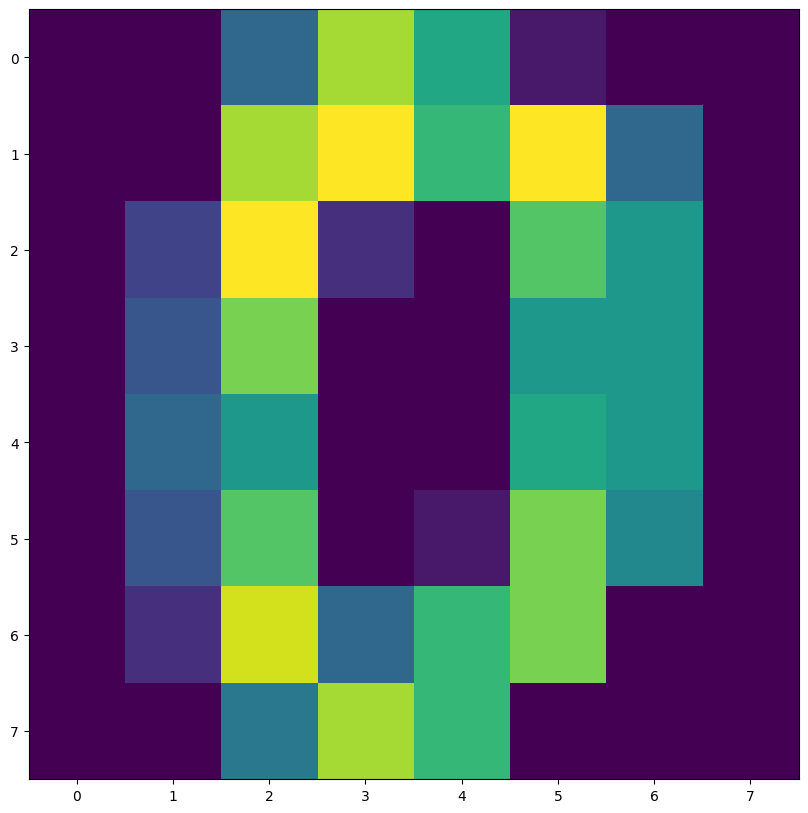

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [ ]:
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

In [ ]:
from random import randint
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

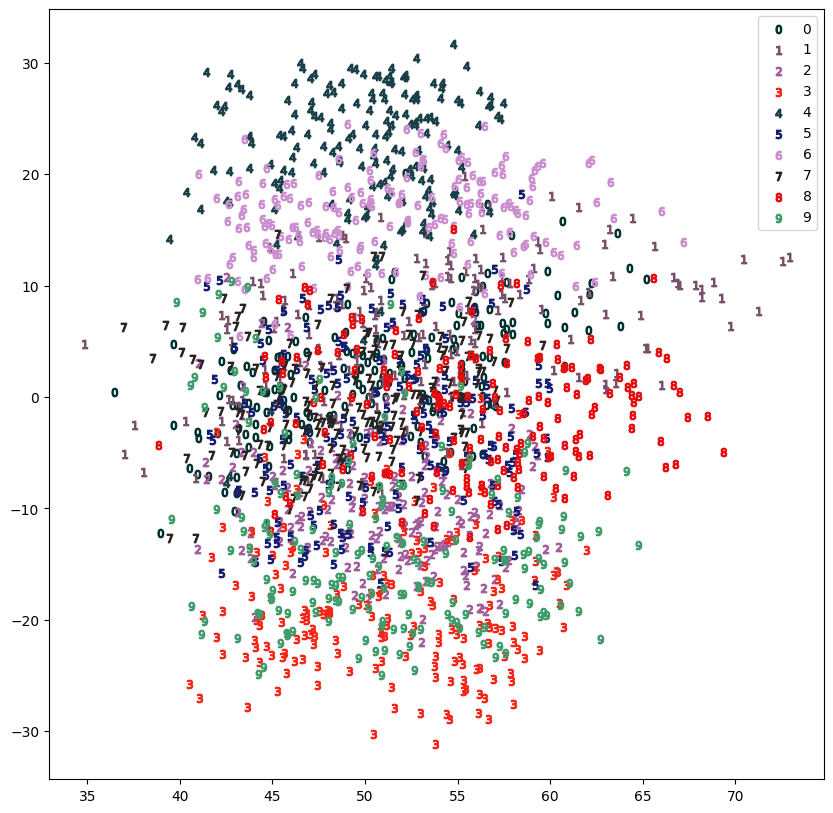

In [ ]:
def draw(colors, features):
    col_1 = features[:,0]
    col_2 = features[0:,1]
    first = [[] for i in range(10)]
    second = [[] for i in range(10)]

    for i in range(features.shape[0]):
        num = digits.target[i]
        first[num].append(col_1[i])
        second[num].append(col_2[i])


    for i in range(10):
        name = str(i)
        plt.scatter(first[i], second[i], c=colors[i], label = name, marker=f'${i}$')

    plt.legend()
    return

draw(colors, np.array(U*S))


**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

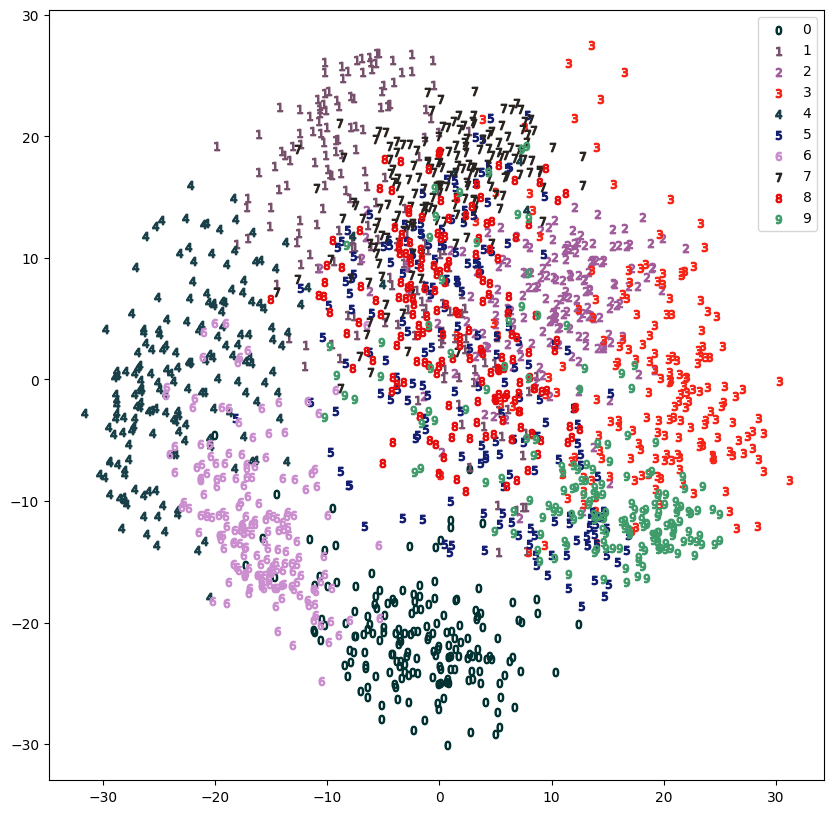

In [ ]:
import copy
data = copy.deepcopy(digits.data)
data = data - data.mean(axis=0, keepdims=True)
U, S, VT = svd(data, full_matrices=False)

draw(colors, np.array(U*S))

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

**В первой визуализации точки с одинаковым "цифровым" значением разбросаны более хаотично по сравнению со вторым представлением, в котором точки с одной цифрой собраны в почти обособленные группы.**

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

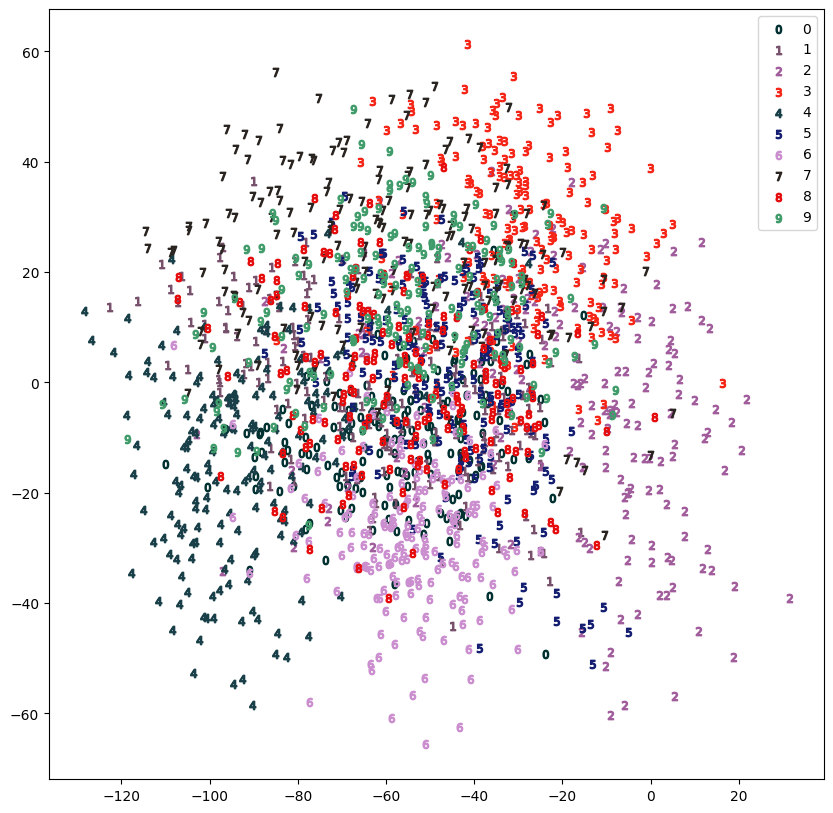

In [ ]:
from sklearn.random_projection import GaussianRandomProjection
rng = np.random.RandomState(42)
transformer = GaussianRandomProjection(n_components = 2, random_state=rng)
data = transformer.fit_transform(digits.data)
U,S,VT = svd(data, full_matrices=False)
draw(colors, np.array(U*S))

**По сравнению с SVD одинаковые цифры хуже собираются в группы, поэтому кажется в этом плане SVD выигрывает.**

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-21-0c89a2db30d8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-21-0c89a2db30d8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-21-0c89a2db30d8>:15: UserWarning: 

`distplot` is 

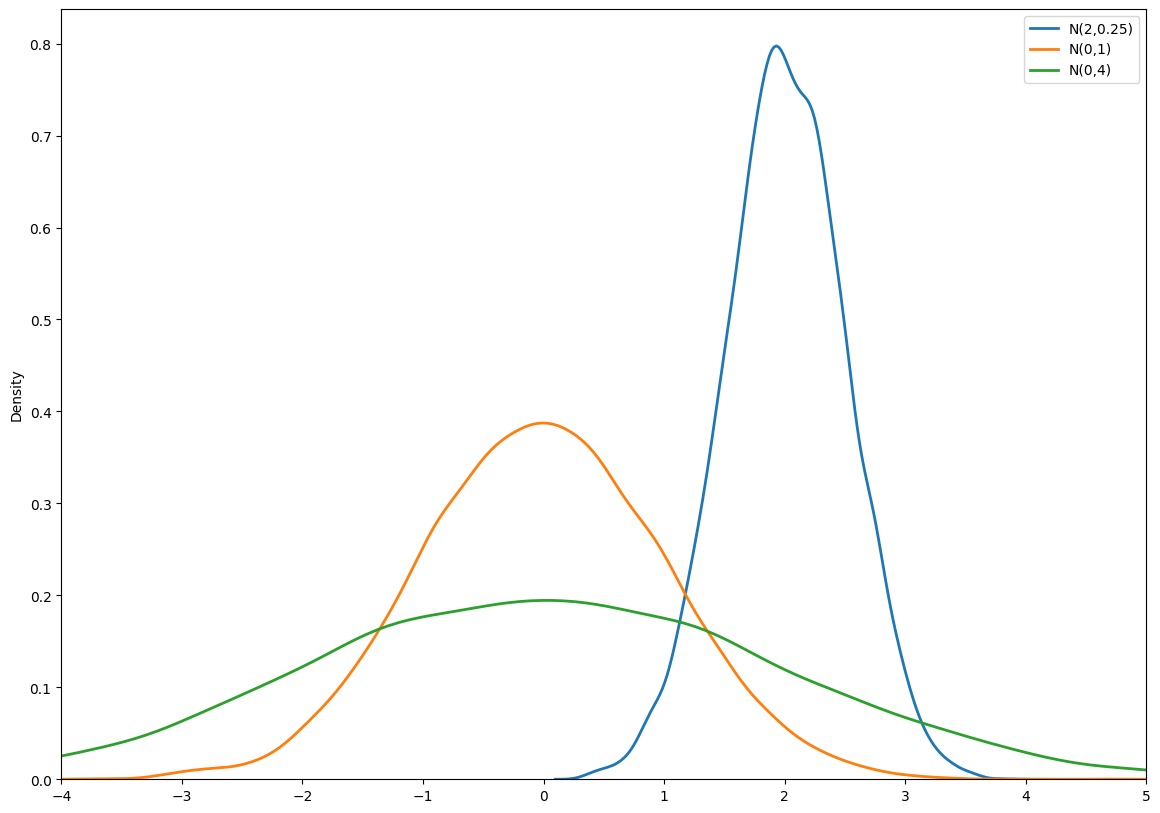

In [ ]:
N = 10000
plt.figure(figsize=(14, 10))
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<Axes: >

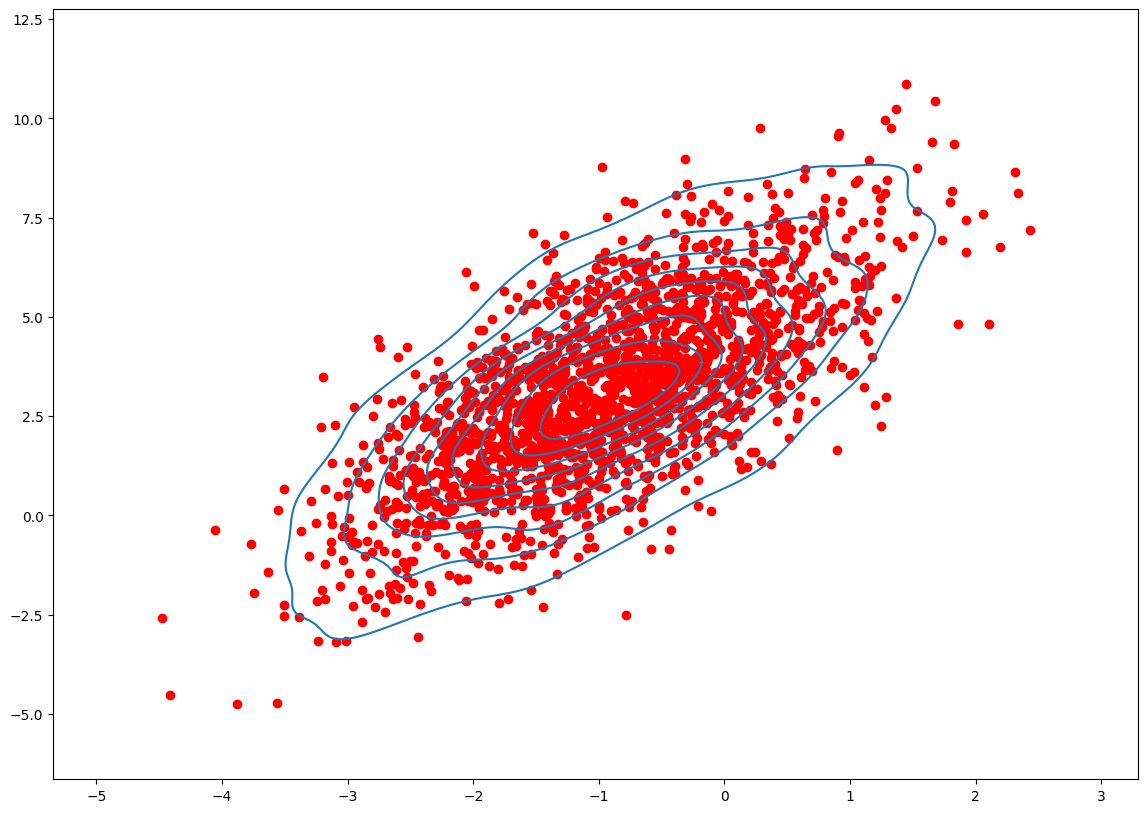

In [ ]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.figure(figsize=(14, 10))
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(data=s, fill=False, x=s[:,0], y=s[:,1])

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

<Axes: >

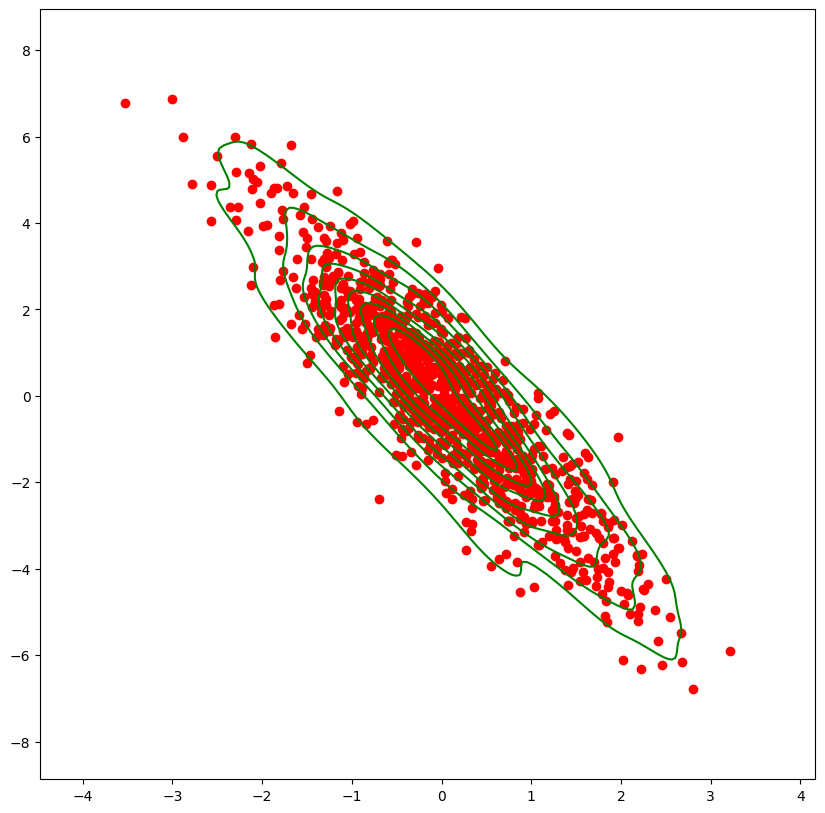

In [ ]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, fill=False, color='g',  x=s[:,0], y=s[:,1])

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

<Axes: >

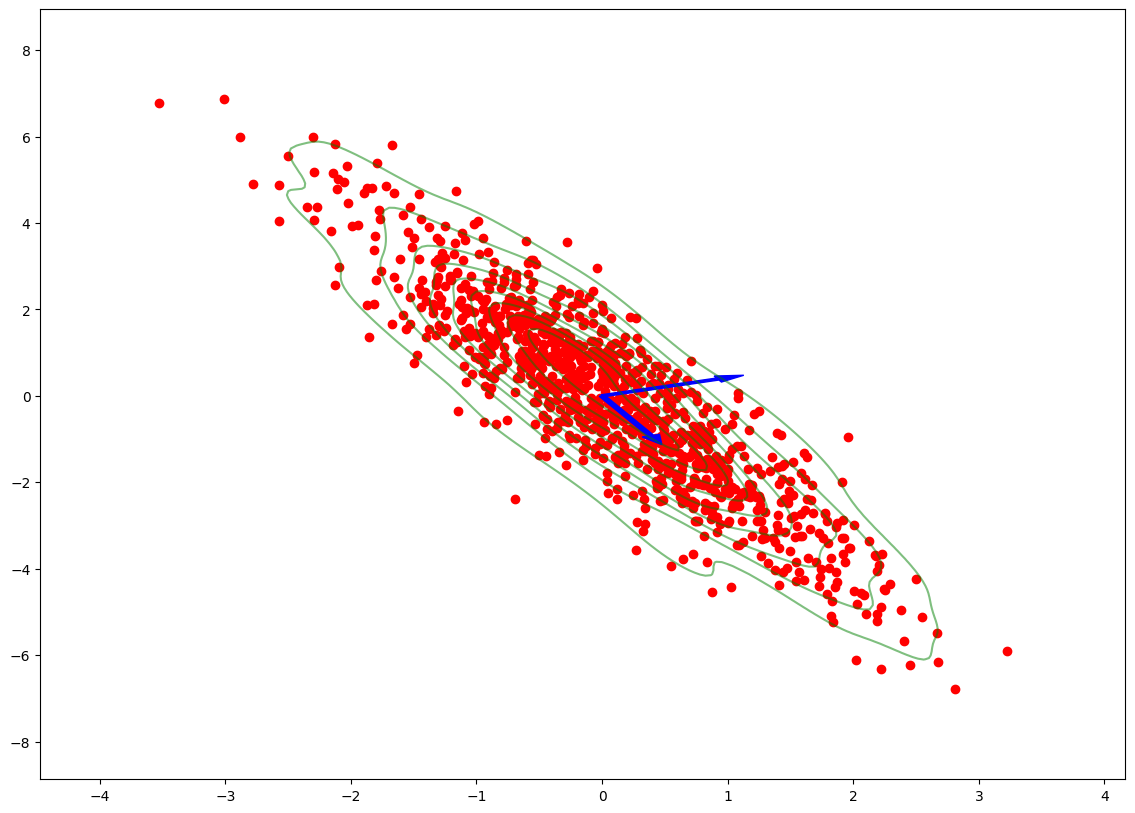

In [ ]:
U, S, VT = svd(s, full_matrices=False)
plt.figure(figsize=(14, 10))
plt.scatter(s[:,0], s[:,1], color='red')
plt.arrow(0, 0, VT[0, 0], VT[0, 1],color = 'b',  width = 0.05)
plt.arrow(0, 0, VT[1, 0], VT[1, 1],color = 'b',  width = 0.05)
sns.kdeplot(s, fill=False, color='g', alpha = 0.5,  x=s[:,0], y=s[:,1])

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.



**Имеем матрицу ковариации $\Sigma$**:
$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}$$

**Найдем хар. многочлен**:
$$det(\Sigma - λE) = det\begin{pmatrix}
1-λ & -2\\
-2 & 5-λ
\end{pmatrix} = (1-\lambda)(5-\lambda) - 4 = 5 - 6\lambda + \lambda^2 - 4 = λ^2 - 6\lambda + 1$$

$$λ^2 - 6\lambda + 1 = (λ - 3 + 2\sqrt2)(λ - 3 - 2\sqrt2)$$

**Поэтому $λ_1 = 3 - 2\sqrt2$, $λ_2 = 3 + 2\sqrt2$ - собственные значения. Таким, образом, если привести матрцу $\Sigma$ к главным осям, то получим:
$\Sigma =
\begin{pmatrix}
3 - 2\sqrt2 & 0\\
0 & 3 + 2\sqrt2
\end{pmatrix}$**

**Далее, найдем собственные векторы:**


*   $\Sigma - λ_1E =  
\begin{pmatrix}
1 - 3 + 2\sqrt2 & -2\\
-2 & 5 - 3 + 2\sqrt2
\end{pmatrix} =
\begin{pmatrix}
 2\sqrt2 - 2& -2\\
-2 & 2 + 2\sqrt2
\end{pmatrix} =
\begin{pmatrix}
\sqrt2 - 1 & -1\\
-1 &1 + \sqrt2
\end{pmatrix} →
\begin{pmatrix}
1 & -(1+\sqrt2)\\
-1 &1 + \sqrt2
\end{pmatrix} →
\begin{pmatrix}
1 & -1-\sqrt2\\
\end{pmatrix} ⟹
v_1 =
\begin{pmatrix}
1+\sqrt2 \\
1\\
\end{pmatrix}
$

*    $\Sigma - λ_2E =
\begin{pmatrix}
1 - 3 - 2\sqrt2 & -2\\
-2 & 5 - 3 - 2\sqrt2
\end{pmatrix} =
\begin{pmatrix}
 -2\sqrt2 - 2& -2\\
-2 & 2 - 2\sqrt2
\end{pmatrix} =
\begin{pmatrix}
-\sqrt2 - 1 & -1\\
-1 &1 - \sqrt2
\end{pmatrix} →
\begin{pmatrix}
\sqrt2 + 1 & 1\\
1 & \sqrt2 - 1
\end{pmatrix} →
\begin{pmatrix}
\sqrt2 + 1 & 1\\
\end{pmatrix} ⟹
v_2 =
\begin{pmatrix}
1-\sqrt2 \\
1\\
\end{pmatrix}
$

**Заметим, что $v_1^T\cdot v_2 = 0$ ⟹ они ортогональны. Ортонормируем их:**
$$v_1 =
\begin{pmatrix}
\frac{1+\sqrt2}{\sqrt{4 + 2\sqrt2}} \\
\frac{1}{\sqrt{4 + 2\sqrt2}}\\
\end{pmatrix} $$

$$v_2 =
\begin{pmatrix}
\frac{1-\sqrt2}{\sqrt{4 - 2\sqrt2}} \\
\frac{1}{\sqrt{4 - 2\sqrt2}}\\
\end{pmatrix} $$

**Осталось понять, что эти векторы соответствуют направлению главных осей: для этого посчитаем углы $\phi_1, \phi_2$ и убедимся, что их разность равна $\frac{pi}{2}$. Второе утверждение, на самом деле, уже доказано, так как векторы $v_1, v_2$ ортогональны. Осталось разобраться с первой частью:**

$$tg(\phi_1) = \frac{y_1}{x_1} = \frac{1}{1+\sqrt2} = \sqrt2 - 1 \Longrightarrow \phi_1 = arctg(\sqrt2 - 1)$$

$$tg(\phi_2) = \frac{y_2}{x_2} = \frac{1}{1-\sqrt2} = -\sqrt2 - 1 \Longrightarrow \phi_2 = arctg(-\sqrt2 - 1)$$

**Посчитаем эти углы в градусах:**

In [ ]:
phi_1 = np.arctan((2)**(0.5) - 1)
phi_2 = np.arctan(-(2)**(0.5) - 1)
deg_phi_1 = np.degrees(phi_1)
deg_phi_2 = np.degrees(phi_2)
print(f'угол между вектором v_1 и осью x: {deg_phi_1} градуса')
print(f'угол между вектором v_2 и осью x: {deg_phi_2} градусов')

угол между вектором v_1 и осью x: 22.500000000000007 градуса
угол между вектором v_2 и осью x: -67.5 градусов


**Эти значения действительно почти точно соответствуют графику. Поэтому направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.**

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

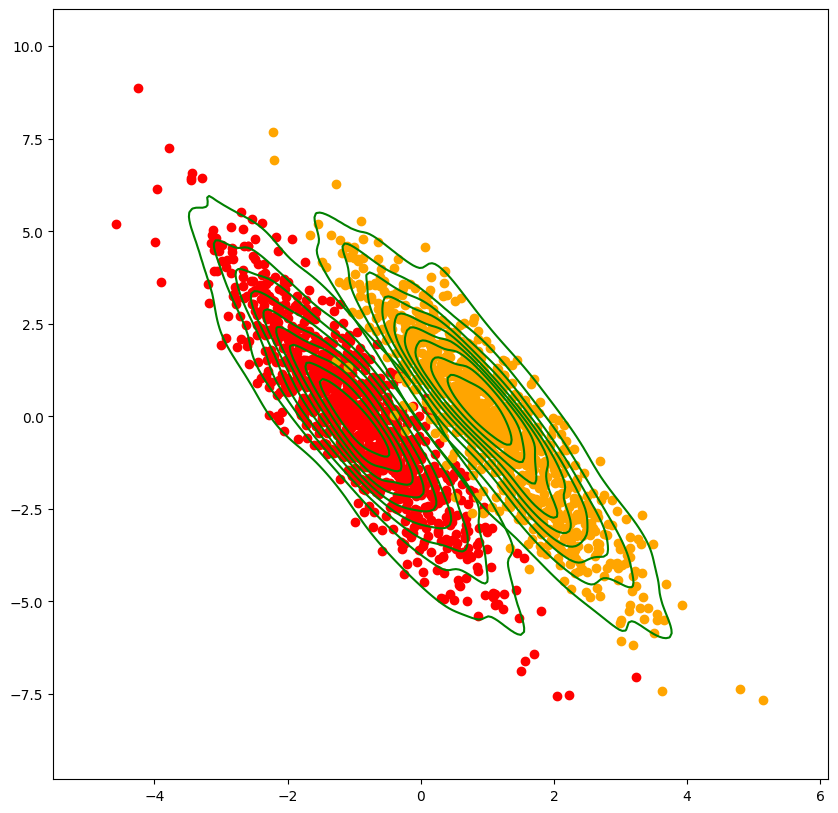

In [ ]:
N = 1000
a = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[1,-2],[-2,5]]), size=N)
plt.scatter(a[:,0], a[:,1], color='red')
sns.kdeplot(a, fill=False, color='g',  x=a[:,0], y=a[:,1])

b = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[1,-2],[-2,5]]), size=N)
plt.scatter(b[:,0], b[:,1], color='orange')
sns.kdeplot(b, fill=False, color='g',  x=b[:,0], y=b[:,1])

lst  = np.concatenate((a,b))

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

<Axes: >

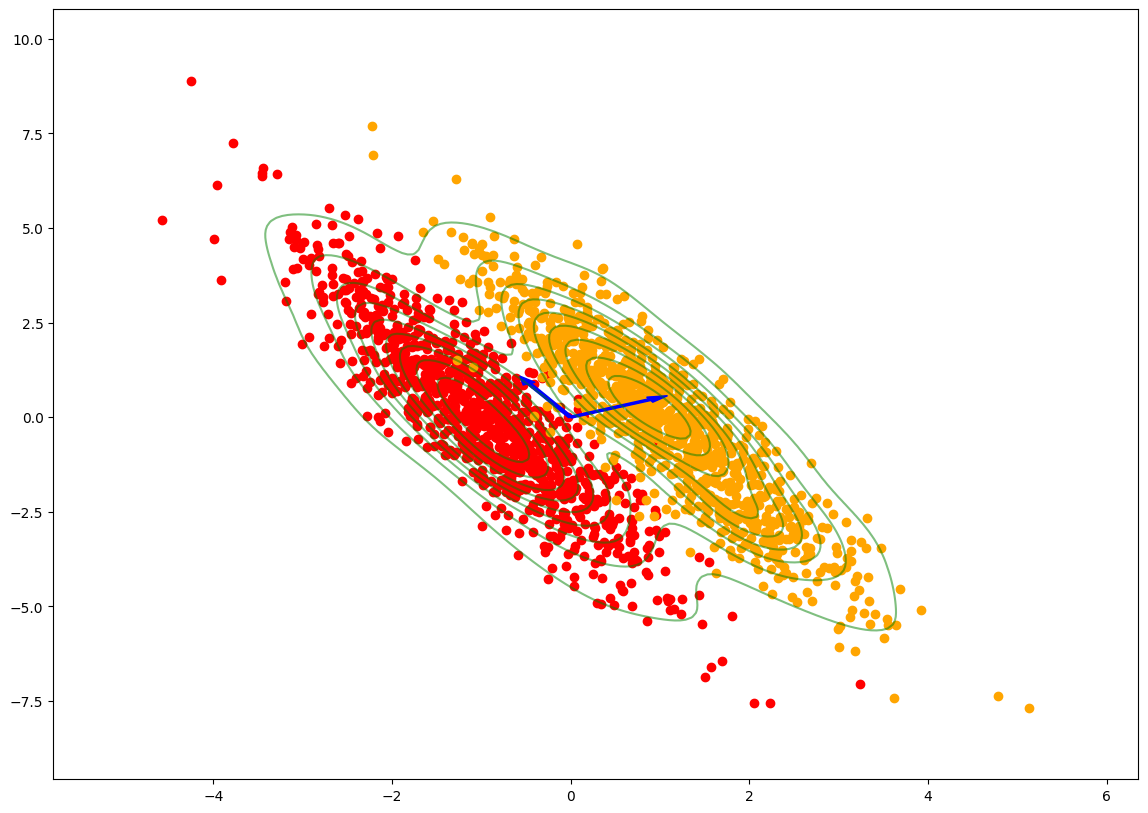

In [ ]:
U, S, VT = svd(lst, full_matrices=False)
plt.figure(figsize=(14, 10))
plt.scatter(a[:,0], a[:,1], color='red')
plt.scatter(b[:,0], b[:,1], color='orange')
plt.arrow(0, 0, VT[0, 0], VT[0, 1],color = 'b',  width = 0.05)
plt.arrow(0, 0, VT[1, 0], VT[1, 1],color = 'b',  width = 0.05)
sns.kdeplot(lst, fill=False, color='g', alpha = 0.5,  x=lst[:,0], y=lst[:,1])

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

**Кажется, что если провести прямую через синий вектор, то мы можем приблизительно найти признак, который бы разделял эти два кластера. Тем не менее, кажется, что все равно точности не хватит.**

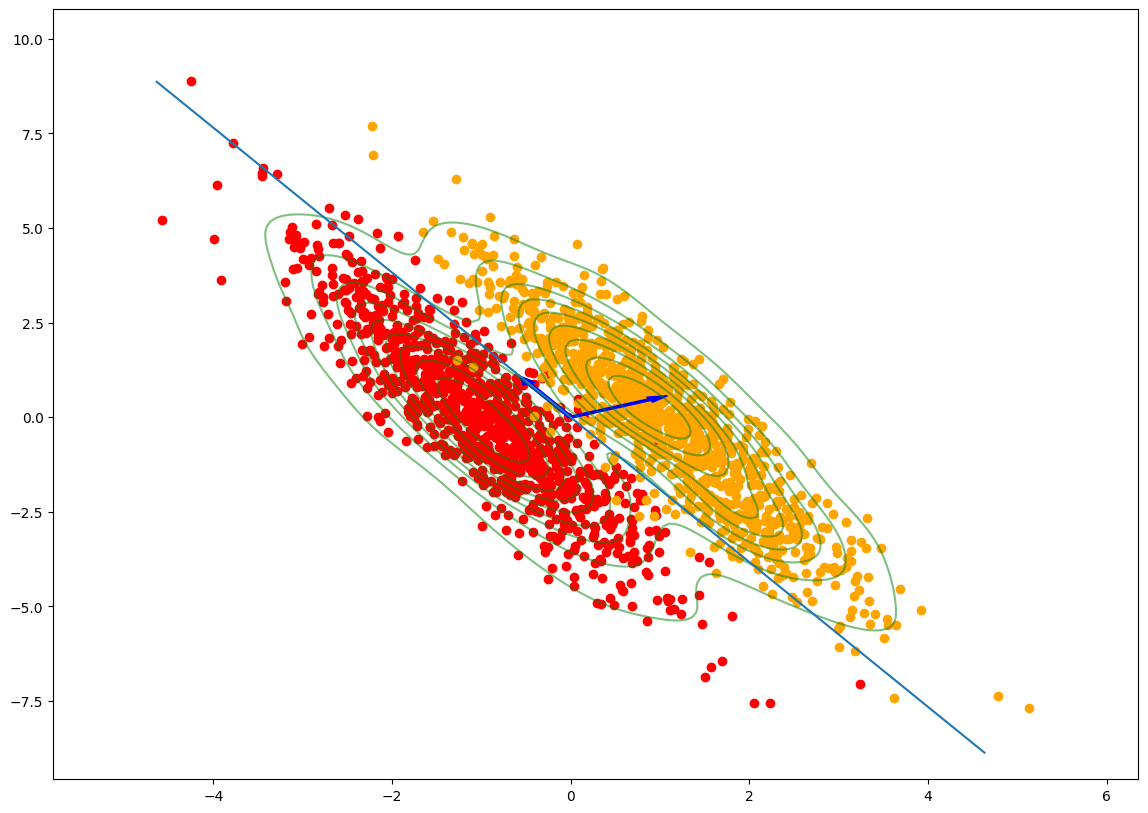

In [ ]:
U, S, VT = svd(lst, full_matrices=False)
plt.figure(figsize=(14, 10))
plt.scatter(a[:,0], a[:,1], color='red')
plt.scatter(b[:,0], b[:,1], color='orange')
plt.arrow(0, 0, VT[0, 0], VT[0, 1],color = 'b',  width = 0.05)
plt.arrow(0, 0, VT[1, 0], VT[1, 1],color = 'b',  width = 0.05)
sns.kdeplot(lst, fill=False, color='g', alpha = 0.5,  x=lst[:,0], y=lst[:,1])
plt.plot([VT[0, 0] * (-10) , VT[0, 0] * 10], [VT[0, 1] * (-10), VT[0, 1] * 10])

Как мы видим, эта прямая действительно не может точно разделить два кластера.  

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

<Axes: >

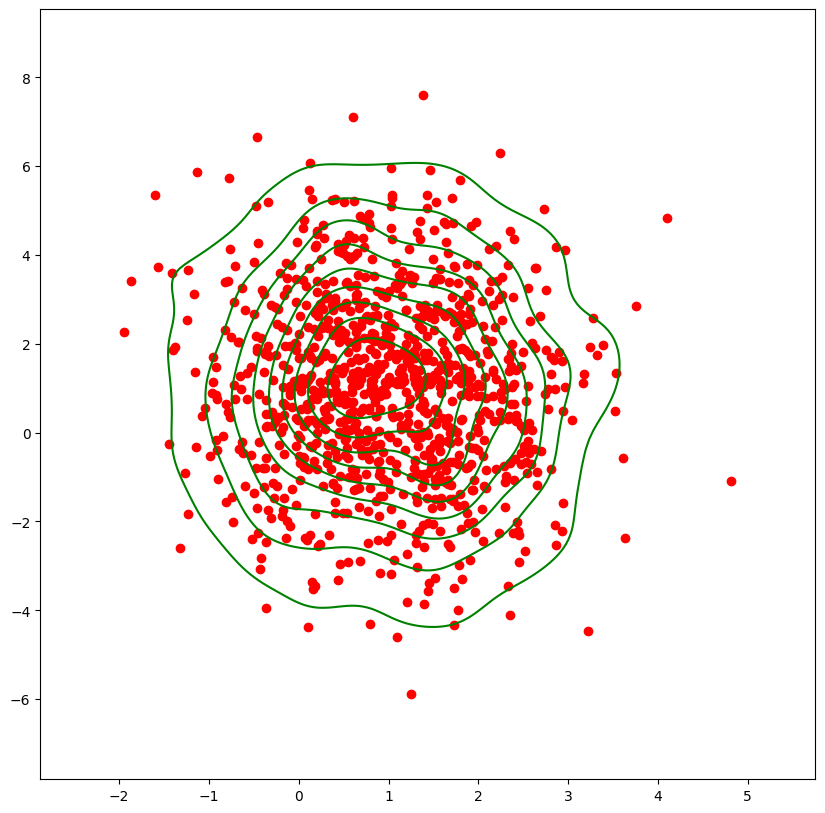

In [ ]:
N = 1000
a = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)
plt.scatter(a[:,0], a[:,1], color='red')
sns.kdeplot(a, fill=False, color='g',  x=a[:,0], y=a[:,1])

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

**Так как матрица диагональная, то при приведении квадратичной формы к главным осям получим либо их сужение, либо растяжение, поэтому полуоси эллипса будут сонаправлены осям координат.**

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

<Axes: >

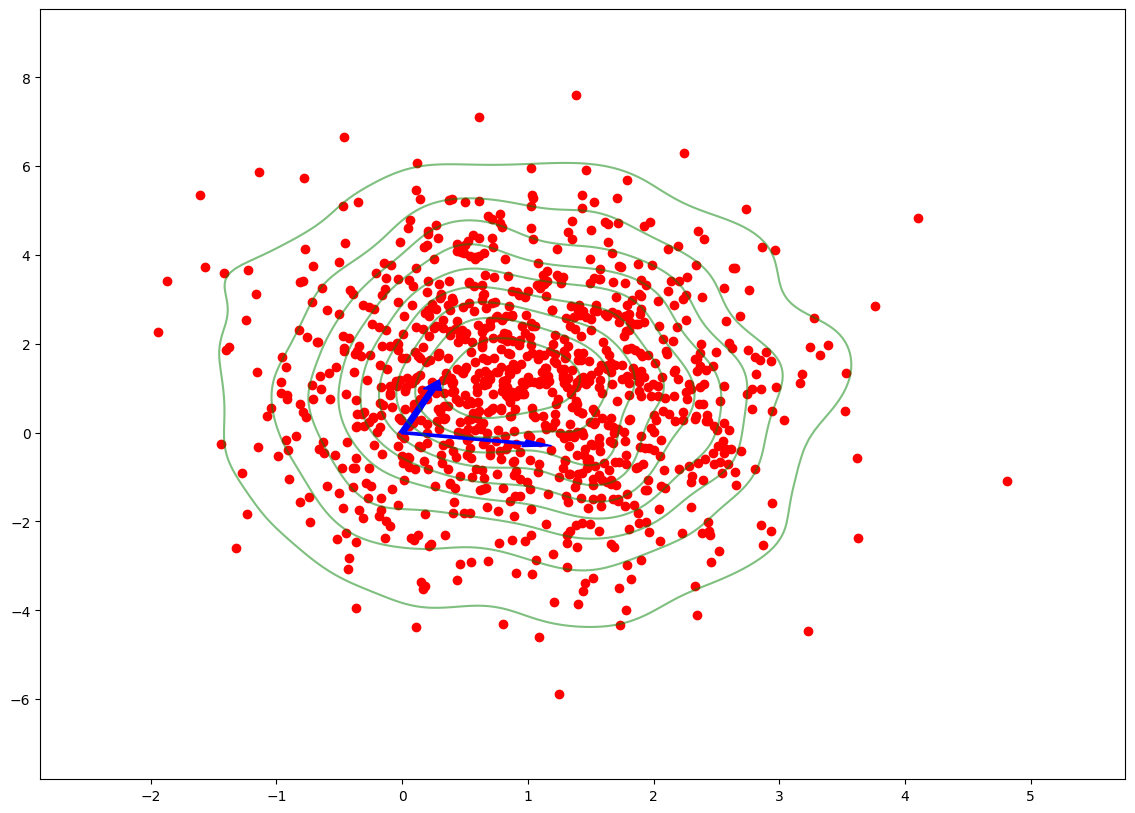

In [ ]:
U, S, VT = svd(a, full_matrices=False)
plt.figure(figsize=(14, 10))
plt.scatter(a[:,0], a[:,1], color='red')
plt.arrow(0, 0, VT[0, 0], VT[0, 1],color = 'b',  width = 0.05)
plt.arrow(0, 0, VT[1, 0], VT[1, 1],color = 'b',  width = 0.05)
sns.kdeplot(a, fill=False, color='g', alpha = 0.5,  x=a[:,0], y=a[:,1])

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

**Если мы хотим использовать SVD, то важно, чтобы облако точек располагалось в нуле, то есть для этого можно из каждого признака повычитать средние значения и получим то, что надо.**

<Axes: >

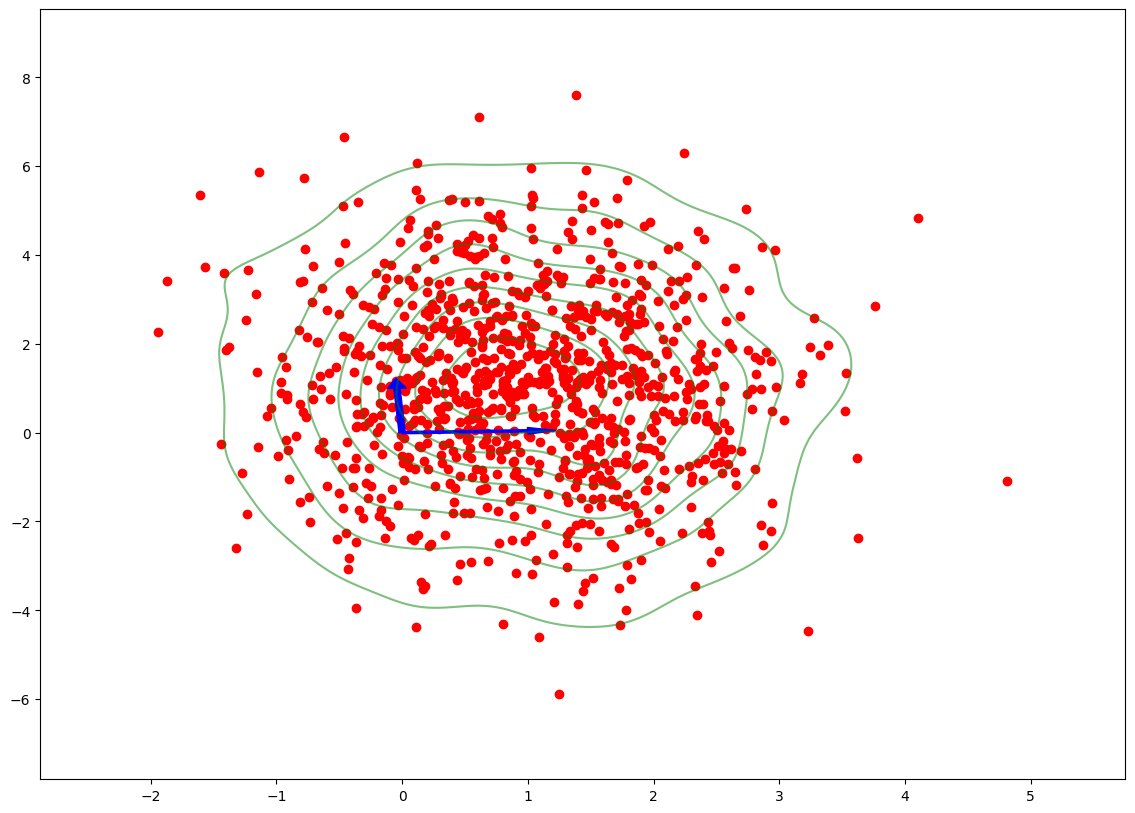

In [ ]:
data = copy.deepcopy(a)
data = data - data.mean(axis=0, keepdims=True)
U, S, VT = svd(data, full_matrices=False)
plt.figure(figsize=(14, 10))
plt.scatter(a[:,0], a[:,1], color='red')
plt.arrow(0, 0, VT[0, 0], VT[0, 1],color = 'b',  width = 0.05)
plt.arrow(0, 0, VT[1, 0], VT[1, 1],color = 'b',  width = 0.05)
sns.kdeplot(a, fill=False, color='g', alpha = 0.5,  x=a[:,0], y=a[:,1])